In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pymc3 as pm

data = pd.read_csv("./EUR_USD_data.csv")
print(data.head())

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\salee\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


        Date   Price    Open    High     Low  per_change  Days
0  28-Oct-14  1.2734  1.2698  1.2765  1.2683      0.0028     0
1  29-Oct-14  1.2632  1.2735  1.2772  1.2631     -0.0080     1
2  30-Oct-14  1.2613  1.2631  1.2640  1.2547     -0.0015     2
3  31-Oct-14  1.2525  1.2612  1.2618  1.2485     -0.0070     3
4   3-Nov-14  1.2483  1.2515  1.2517  1.2441     -0.0034     4


In [2]:
X = data.loc[:, ['Open', 'High', 'Low']]
y = data.ix[:,'Price']

C:\Users\salee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


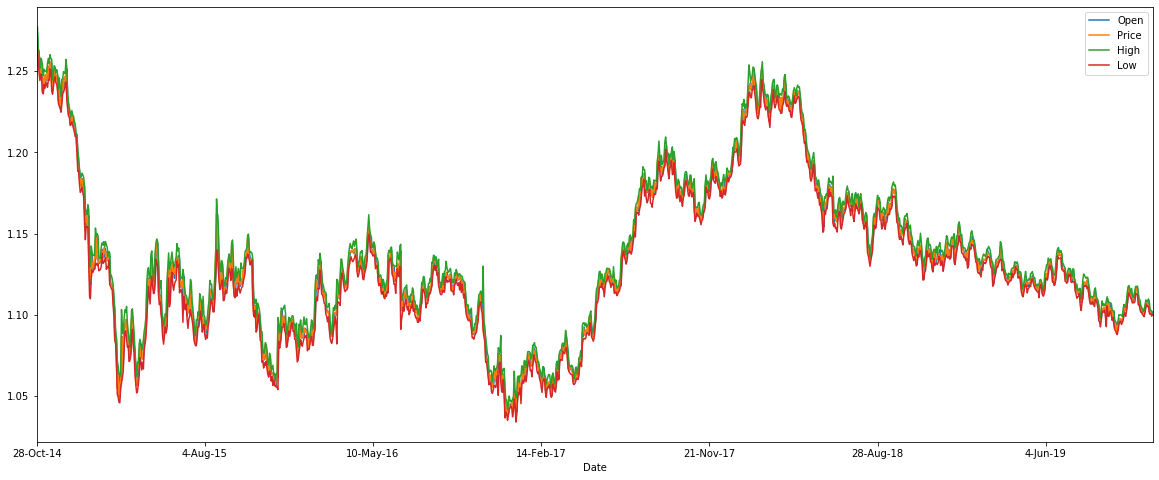

In [3]:
plt.figure(figsize=(20,8))
ax=plt.gca()
data.plot(kind='line',x='Date',y='Open',ax=ax)
data.plot(kind='line',x='Date',y='Price',ax=ax)
data.plot(kind='line',x='Date',y='High',ax=ax)
data.plot(kind='line',x='Date',y='Low',ax=ax)
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
data['PCA_data'] = pca.fit_transform(X)
data.head()
# X=pd.DataFrame(X)

,Date,Price,Open,High,Low,per_change,Days,PCA_data
0,28-Oct-14,1.2734,1.2698,1.2765,1.2683,0.0028,0,0.238415
1,29-Oct-14,1.2632,1.2735,1.2772,1.2631,-0.0080,1,0.237954
2,30-Oct-14,1.2613,1.2631,1.2640,1.2547,-0.0015,2,0.219482
3,31-Oct-14,1.2525,1.2612,1.2618,1.2485,-0.0070,3,0.213534
4,3-Nov-14,1.2483,1.2515,1.2517,1.2441,-0.0034,4,0.199564


In [8]:
# X.head()
data['data_bins']=pd.cut(data['PCA_data'],15)
data.head()

,Date,Price,Open,High,Low,per_change,Days,PCA_data,data_bins
0,28-Oct-14,1.2734,1.2698,1.2765,1.2683,0.0028,0,0.238415,"(0.212, 0.238]"
1,29-Oct-14,1.2632,1.2735,1.2772,1.2631,-0.0080,1,0.237954,"(0.212, 0.238]"
2,30-Oct-14,1.2613,1.2631,1.2640,1.2547,-0.0015,2,0.219482,"(0.212, 0.238]"
3,31-Oct-14,1.2525,1.2612,1.2618,1.2485,-0.0070,3,0.213534,"(0.212, 0.238]"
4,3-Nov-14,1.2483,1.2515,1.2517,1.2441,-0.0034,4,0.199564,"(0.185, 0.212]"


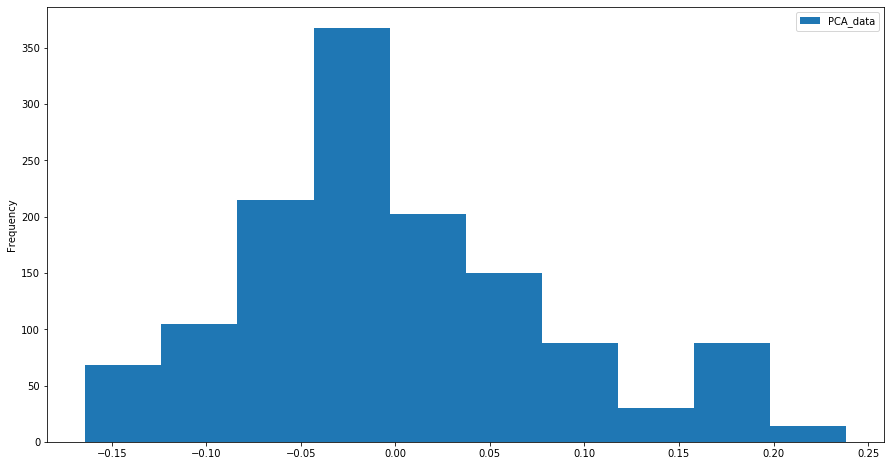

In [6]:
plt.figure(figsize=(15,8))
ax=plt.gca()
data.plot(kind='hist',x='data_bins', y='PCA_data',ax=ax)
plt.show()

In [10]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * data.loc[:, 'PCA_data']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 4 chains: 100%|████████████████████████████████████████████████████████| 6000/6000 [42:38<00:00,  2.35draws/s]
The acceptance probability does not match the target. It is 0.9462468895843045, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9562843873696687, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.949045493293188, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9368282109065713, but should be close to 0.8. Try to increase the number of tuning steps.


In [15]:
X = data.loc[:, ['PCA_data']]
y = data.ix[:,'Price']

C:\Users\salee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


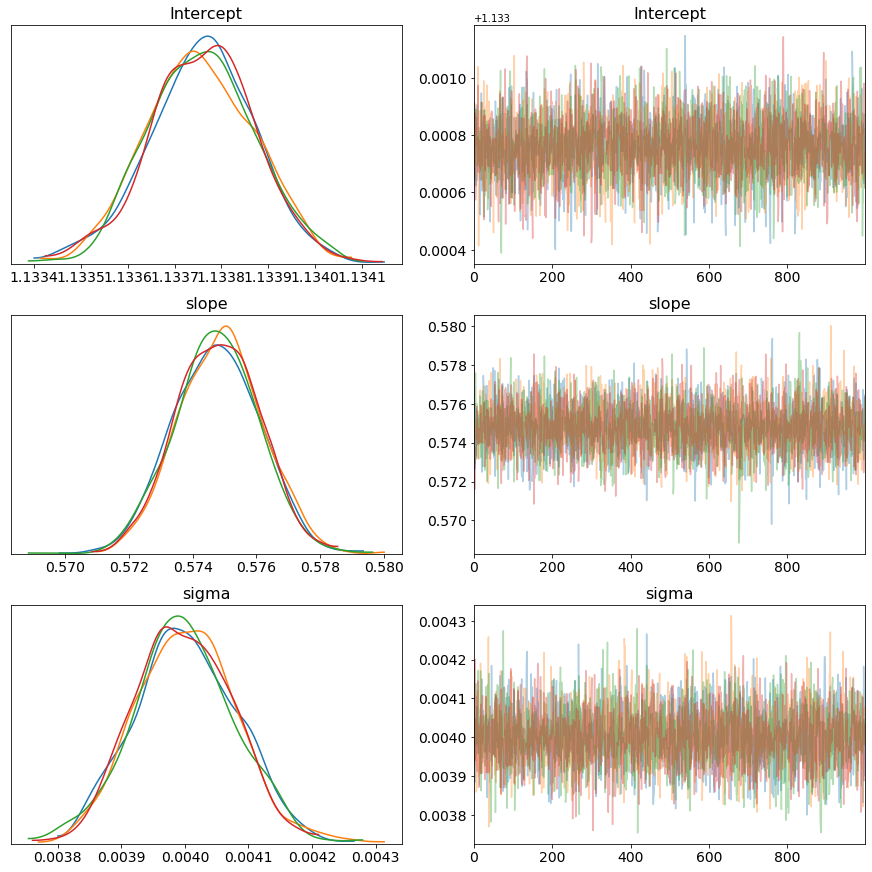

In [11]:
pm.traceplot(linear_trace, figsize = (12, 12));

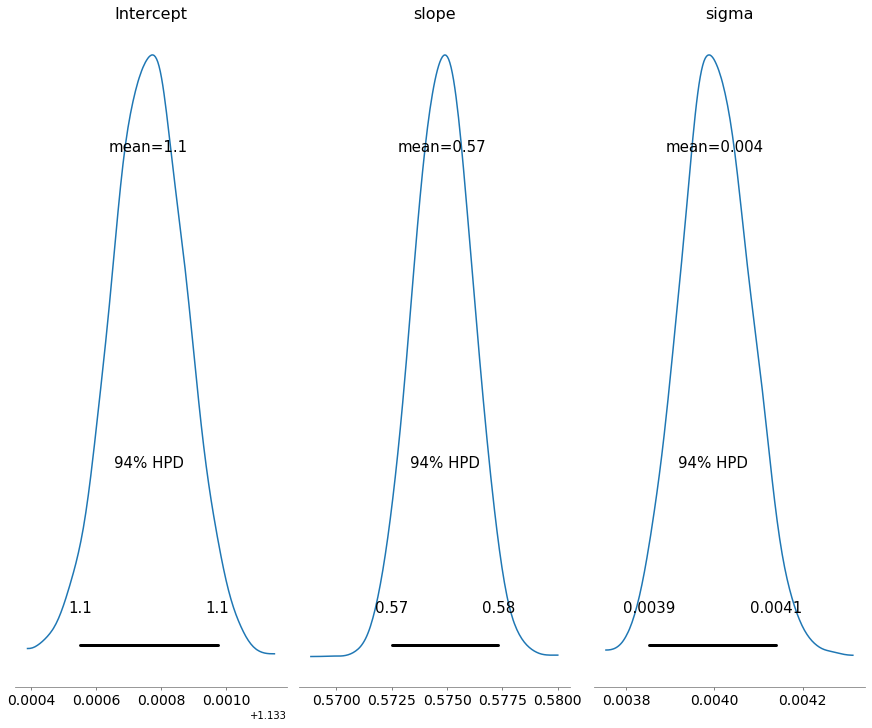

In [12]:
pm.plot_posterior(linear_trace, figsize = (12, 10));

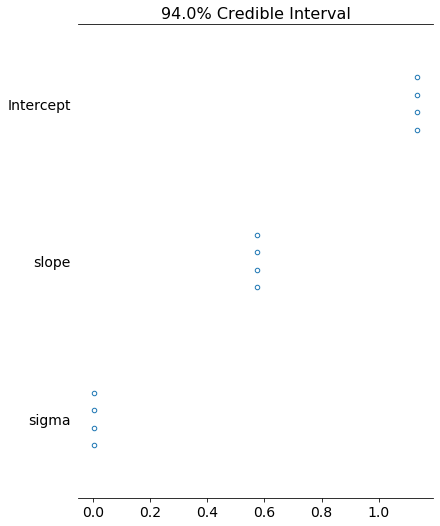

In [13]:
pm.forestplot(linear_trace);

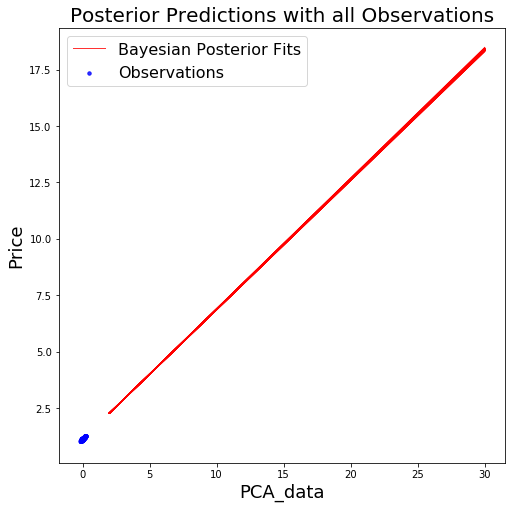

In [16]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['PCA_data'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('PCA_data', size = 18);
plt.ylabel('Price', size = 18);
plt.legend(prop={'size': 16});

In [17]:
pm.df_summary(linear_trace)

AttributeError: module 'pymc3' has no attribute 'df_summary'

In [18]:
bayes_prediction = linear_trace['Intercept'] + linear_trace['slope'] * 15

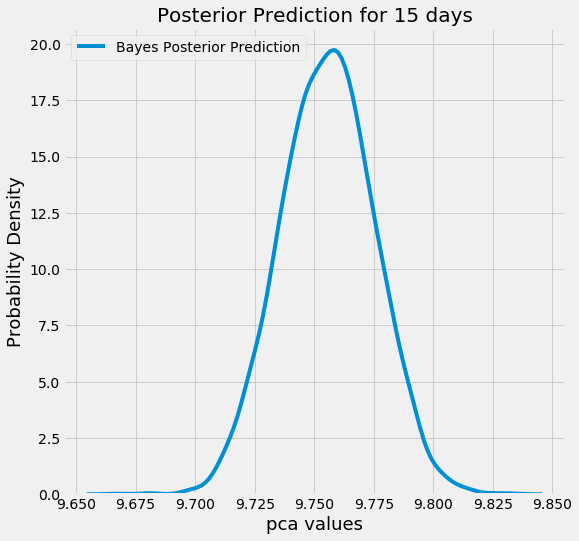

In [24]:
import seaborn as sns
plt.figure(figsize = (8,8))
plt.style.use('fivethirtyeight')
sns.kdeplot(bayes_prediction, label = 'Bayes Posterior Prediction')
plt.legend();
plt.xlabel('pca values', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 15 days', size = 20);